In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [281]:
# Pandas options

# Formatando e deixando os números sem casas decimais para notação cientifica.
pd.options.display.float_format = '{:.0f}'.format

# numero maximo de linhas
pd.set_option('display.max_rows', 500)


In [282]:
# Seaborn and matplotlib options

plt.figure(figsize=(15,5));
sns.set(rc={'figure.figsize':(15,5), 'xtick.direction':'in'});

# Função que seta algumas propriedades dos graficos mpl.
def cfg_plot(title='', xlabel='', ylabel='', rotation=0):
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

<Figure size 1080x360 with 0 Axes>

In [283]:
df = pd.read_json('base-dados-clube-da-aposta.json')

In [284]:
ordens_coluna = ['home_name', 'away_name', 'home_score', 'away_score', 'final_result',
       'time', 'home_pos', 'away_pos', 'round', 'home_last5all_home',
       'home_last5all_home_win', 'home_last5all_home_draw',
       'home_last5all_home_lose', 'away_last5all_away',
       'away_last5all_away_win', 'away_last5all_away_draw',
       'away_last5all_away_lose', 'last5all_home_away_dif', 'fifa_home_ova',
       'fifa_home_att', 'fifa_home_mid', 'fifa_home_def', 'fifa_away_ova',
       'fifa_away_att', 'fifa_away_mid', 'fifa_away_def', 'elo_home_score',
       'elo_away_score', 'tfm_value_home', 'tfm_value_away']

In [285]:
df = df[ordens_coluna]

In [286]:
df = df.sort_index()

In [287]:
df.head(10)

,home_name,away_name,home_score,away_score,final_result,time,home_pos,away_pos,round,home_last5all_home,...,fifa_home_mid,fifa_home_def,fifa_away_ova,fifa_away_att,fifa_away_mid,fifa_away_def,elo_home_score,elo_away_score,tfm_value_home,tfm_value_away
0,FC Porto,Nacional,3,1,H,1546895700,1,11,16,9,...,81,80,70,70,70,69,1814,1393,277980000,9450000
1,Tenerife,Elche,2,1,H,1546632000,18,15,20,2,...,71,69,67,69,67,67,1513,1476,10900000,9600000
2,Niort,Brest,1,1,D,1545420600,7,2,19,1,...,65,65,68,68,68,69,1385,1496,6700000,15850000
3,Liverpool,Man Utd,3,1,H,1544976000,2,6,17,11,...,83,81,83,84,82,79,1931,1841,913000000,835000000
4,Southampton,Arsenal,3,2,H,1544967000,19,5,17,-3,...,77,77,82,85,83,80,1606,1856,266100000,574000000
5,Brighton,Chelsea,1,2,A,1544967000,13,4,17,3,...,75,76,83,84,84,83,1637,1859,177000000,892250000
6,Fulham,West Ham,0,2,A,1544895000,20,11,17,-6,...,76,73,78,79,77,77,1574,1690,250500000,287500000
7,Huddersfield,Newcastle,0,1,A,1544886000,18,15,17,-3,...,74,75,76,76,76,76,1546,1625,120600000,174000000
8,Crystal Palace,Leicester,1,0,H,1544886000,16,9,17,0,...,77,76,78,82,77,78,1640,1686,219250000,344500000
9,Tottenham,Burnley,1,0,H,1544886000,3,17,17,5,...,83,83,77,76,77,77,1907,1617,837500000,181750000


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5163 entries, 0 to 5162
Data columns (total 30 columns):
home_name                  5163 non-null object
away_name                  5163 non-null object
home_score                 5163 non-null int64
away_score                 5163 non-null int64
final_result               5163 non-null object
time                       5163 non-null int64
home_pos                   5163 non-null int64
away_pos                   5163 non-null int64
round                      5163 non-null int64
home_last5all_home         5163 non-null int64
home_last5all_home_win     5163 non-null int64
home_last5all_home_draw    5163 non-null int64
home_last5all_home_lose    5163 non-null int64
away_last5all_away         5163 non-null int64
away_last5all_away_win     5163 non-null int64
away_last5all_away_draw    5163 non-null int64
away_last5all_away_lose    5163 non-null int64
last5all_home_away_dif     5163 non-null int64
fifa_home_ova              5163 non-null int

Não há distinção entre ligas dos países. Isso pode ser um fator que pode influenciar no resultado.

In [289]:
df.home_name.value_counts().head()

Man City       35
Chelsea        35
Southampton    34
Swansea        34
West Brom      34
Name: home_name, dtype: int64

Existem times duplicados no dataset. O conjunto de dados retrata os resultados de várias rodadas de vários campeonatos.

## Home x Away scores

Quem ganhou na maioria das vezes? Mandante ou visitante?

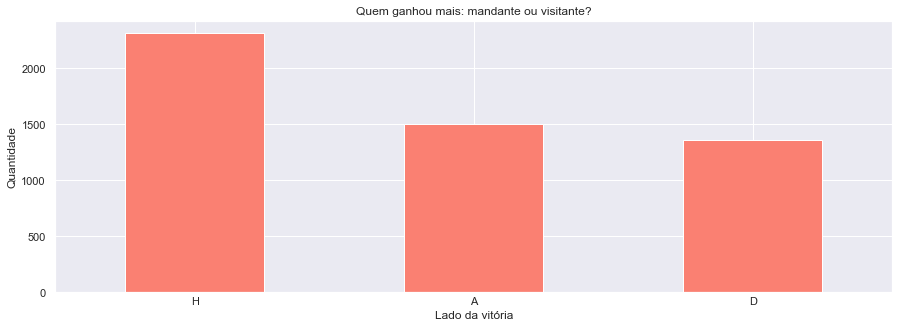

In [290]:
df.final_result.value_counts().plot(kind='bar', color='salmon')
cfg_plot('Quem ganhou mais: mandante ou visitante?', 'Lado da vitória', 'Quantidade')

Como era de se esperar, mandantes ganham mais. Mas os visitantes também tem uma parcela de vitórias. Vamos investigar!

## fifa_ova e tfm_value

O ranking na FIFA e o valor de mercado do time influenciam nas vitórias dos visitantes? Vamos ver:

In [291]:
only_away = df[df.final_result == 'A'][['home_name', 'away_name','fifa_home_ova', 'fifa_away_ova', 'tfm_value_home', 'tfm_value_away']]
only_away.head()

,home_name,away_name,fifa_home_ova,fifa_away_ova,tfm_value_home,tfm_value_away
5,Brighton,Chelsea,76,83,177000000,892250000
6,Fulham,West Ham,76,78,250500000,287500000
7,Huddersfield,Newcastle,75,76,120600000,174000000
11,Levante,Barcelona,76,86,86000000,1230000000
16,Valladolid,Atletico Madrid,73,84,41700000,898000000


In [292]:
ova_diff = only_away[['fifa_home_ova', 'fifa_away_ova']].apply(lambda x: x[1]-x[0],axis=1)
ova_diff

5        7
6        2
7        1
11      10
16      11
20       7
22       2
24       8
28       4
30       8
32      11
34      -1
39       5
41       2
43       8
45       1
58       3
63       0
71       4
72       1
80       3
83       3
85      -1
94       8
99       9
100      4
102     -1
104      4
105     11
106      1
115     -4
116      3
118      7
122      3
123      3
125      1
129      1
132     10
136      7
139      0
140      4
146     10
147     -1
151      8
155      3
157      1
160      7
161      1
166      8
169      0
170      7
172      7
175      2
184     -2
192     -9
193      4
195      0
197      6
204      3
206      5
210     -7
211      6
214      7
218     -5
221     -2
224     -1
229      5
230      5
236     -1
238      5
243     -3
246      0
248      1
249      7
253      2
254      2
256      1
259      5
261      7
265      9
269      0
270     -7
276      1
279     -1
281     -4
283     10
288     -2
291      7
293      7
295      1
296      0

In [293]:
ova_diff.value_counts().count()

27

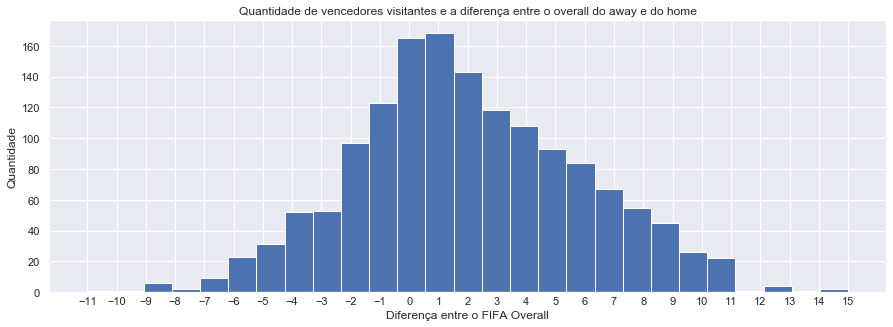

In [294]:
# total de registros
total_reg = ova_diff.value_counts()

ova_diff.hist(bins=total_reg.count())
plt.xticks(ova_diff.value_counts().index)
cfg_plot("Quantidade de vencedores visitantes e a diferença entre o overall do away e do home", 
         "Diferença entre o FIFA Overall", 
         "Quantidade")

Diferenças positivas indicam que o time visitante tem o ranking mais alto.
Diferenças negativas indicam que o time da casa tem o ranking mais alto.

Os dados retratam praticamente uma curva normal padrão. As diferenças positivas parecem seguir uma tendência mais suave até o final, enquanto as diferenças negativas parecem não ser tão suaves assim.

In [295]:
print('Desvio padrão: {0}'.format(ova_diff.std()))
print('Média: {0}'.format(ova_diff.mean()))

Desvio padrão: 4.063045300465072
Média: 2.001333333333333


Verificando a média e o desvio padrão dos dados, é possível notar que 95% dos dados encontram-se entre -6 e 10. Isso é suficiente para dizer que a maioria dos times com o Overall maior ganham mais jogos fora de casa.

Então times com Overall baixo que ganham de times melhores, são considerados zebras? Difícil saber sem analisar outras características separadamente como Overall apenas da defesa ou gols pró em todo campeonato.

Times com menor investimento geralmente possuem Overall mais baixo e quando esses times enfretam clubes maiores geralmente se fecham na defesa e esperam AQUELA bola do jogo inteiro mesmo jogando em casa, mas isso claro que não é regra. É necessário analisar outras características para afirmar algo com mais precisão.

In [296]:
vm_diff = (only_away[['tfm_value_home', 'tfm_value_away']].apply(lambda x: x[1]-x[0],axis=1))/1000000 # diferença entre milhões
vm_diff

5       715
6        37
7        53
11     1144
16      856
20      403
22       86
24      625
28       65
30      260
32      257
34       -3
39      106
41        4
43      149
45        5
58       76
63       -1
71       43
72        3
80       11
83        2
85        2
94      158
99      147
100     120
102      -3
104     167
105     176
106       5
115     -20
116       2
118     176
122     121
123       9
125      14
129      -4
132     189
136      33
139       8
140      16
146     161
147      -6
151     161
155     139
157       3
160     155
161       0
166      90
169      18
170     -11
172      46
175     100
184     -73
192    -119
193      45
195      76
197      76
204     113
206      42
210     -46
211      -9
214     -16
218     -50
221     -10
224     -46
229       0
230     -20
236      -6
238       9
243       4
246     -23
248     -67
249      63
253      17
254      44
256      24
259      33
261      44
265      87
269       1
270     -70
276      11
279 

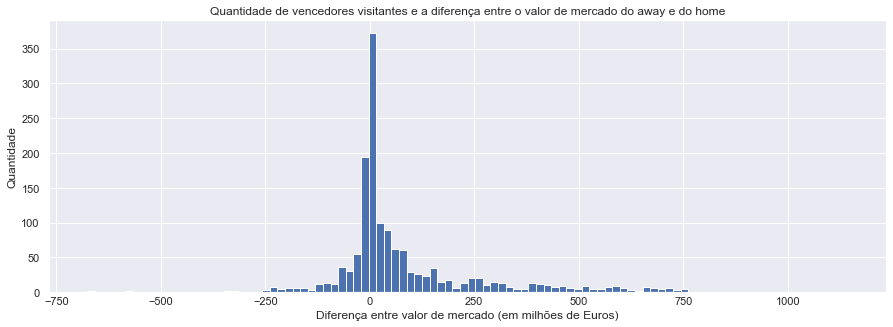

In [297]:
plt.hist(vm_diff, bins=100)
cfg_plot("Quantidade de vencedores visitantes e a diferença entre o valor de mercado do away e do home", 
         "Diferença entre valor de mercado (em milhões de Euros)", 
         "Quantidade")

Apenas por esse gráfico é possível notar que a vitória do visitante acontece em grande parte das vezes quando o time de fora vale mais (a diferença pode chegar a 750 milhões de Euros!).

Um fato interessante está no outlier que aparenta uma diferença pequena de valores. Limitando apenas para o outlier:

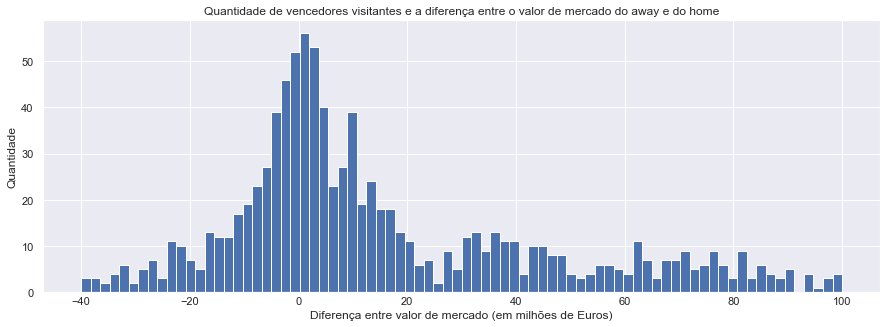

In [298]:
# limitando o range
plt.hist(vm_diff, bins=80, range=(-40,100))
cfg_plot("Quantidade de vencedores visitantes e a diferença entre o valor de mercado do away e do home", 
         "Diferença entre valor de mercado (em milhões de Euros)", 
         "Quantidade")

O outlier positivo é devido à concentração das diferenças até 20 milhões de Euros. É nessa faixa que acontecem grande parte das vitórias fora de casa.

In [299]:
df_prov = df[['home_name', 'away_name']]
df_prov['diff_values'] = df.apply(lambda x: x['tfm_value_home']-x['tfm_value_away'], axis=1)/1000000
df_prov[(df_prov['diff_values'] <= 20) & (df_prov['diff_values'] >= 15)].sort_values(by='home_name')

#Diferenças positivas indicam times da casa com valor maior. Diferenças negativas indicam times de fora com valor maior.

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,home_name,away_name,diff_values
1572,ADO Den Haag,De Graafschap,16
2778,AZ,FC Utrecht,16
2676,Ajax,Feyenoord,17
1429,Angers,Nimes,16
4894,Angers,Nancy,18
2913,Antalyaspor,Alanyaspor,16
3208,Aston Villa,Middlesbrough,19
1537,Augsburg,SC Freiburg,15
2238,Auxerre,AS Beziers,16
3063,Birmingham,Sheff Utd,17


Olhando rapidamente a lista gerada (entre 15 e 20 maiores diferenças) os times que se enquadram nesse range estão com os tamanhos bem próximos. Por exemplo, Aston Villa e Middlesbrough são times considerados fracos da Premier League. Por outro lado, os 3 maiores de Portugal também estão nessa listagem com os valores bem próximos.

## Elo score

Mais informções: [Como calcular Elo para seleções](https://en.wikipedia.org/wiki/FIFA_World_Rankings), [De onde o Elo veio](https://en.wikipedia.org/wiki/Elo_rating_system)

O poder de previsão desse score tende a ser alto. Então provavelmente ele será usado no modelo final. Vamos explorá-lo um pouco:

In [303]:
df_elo = df[['elo_home_score', 'elo_away_score', 'final_result']]

In [304]:
df_elo['elo_diff'] = df_elo.apply(lambda x: x[0]-x[1],axis=1)

# Valores positivos: Home maior
# Valores negativos: Away maior

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [311]:
# adicionando notação para facilitar a contagem de resultados positivos e negativos.
df_elo['pos_neg'] = df_elo.apply(lambda x: 'P' if x['elo_diff']>=0 else 'N' ,axis=1)

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [313]:
df_elo.head()

,elo_home_score,elo_away_score,final_result,elo_diff,pos_neg
0,1814,1393,H,421,P
1,1513,1476,H,38,P
2,1385,1496,D,-111,N
3,1931,1841,H,90,P
4,1606,1856,H,-250,N


### Analisando os resultados de acordo com o score Elo

#### 1) Vitória Home & Score+-

Mandantes geralmente ganham os jogos. Times mais fracos podem se beneficiar disso mesmo tendo um time mais fraco. Um score `positivo` significa que o time da casa tem o score mais alto que o time de fora.

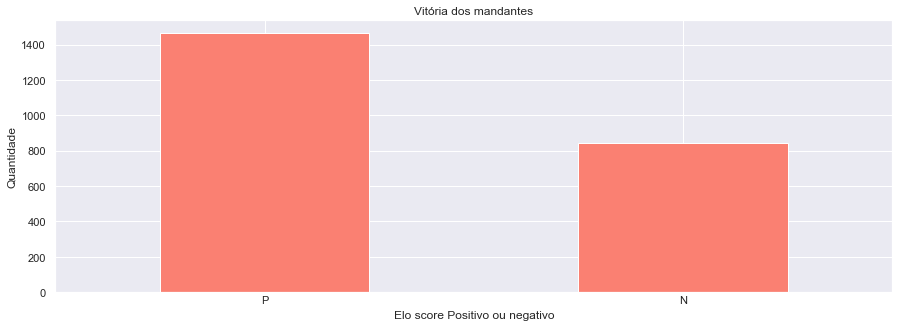

In [334]:
df_elo[df_elo.final_result=='H'].pos_neg.value_counts().plot(kind='bar', color='salmon')
cfg_plot("Vitória dos mandantes", "Elo score Positivo ou negativo", "Quantidade")

Mandantes e elo score positivo realmente ganham a maioria dos jogos - quase o dobro das vezes.

#### 2) Vitória Away & Score+-


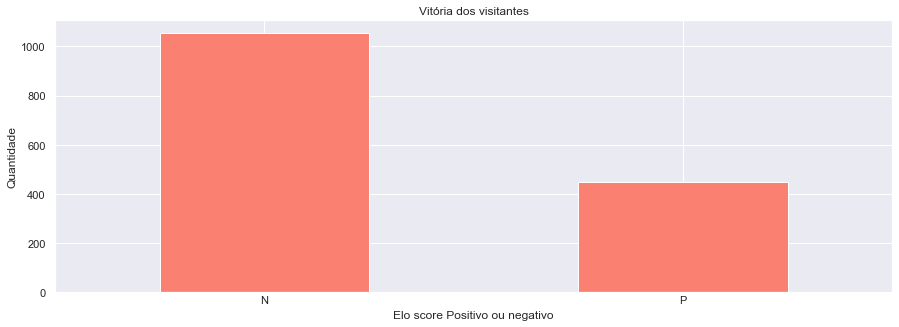

In [337]:
df_elo[df_elo.final_result=='A'].pos_neg.value_counts().plot(kind='bar', color='salmon')
cfg_plot("Vitória dos visitantes", "Elo score Positivo ou negativo", "Quantidade")

Como era de se esperar, os times visitantes que ganham fora de casa são melhores que os mandantes. Isso acontece mais que o dobro das vezes. Mas esses times são muito piores?

In [341]:
df_elo[df_elo.final_result=='A'].describe()

,elo_home_score,elo_away_score,elo_diff
count,1500,1500,1500
mean,1540,1615,-75
std,126,168,139
min,1259,1286,-519
25%,1439,1483,-160
50%,1532,1590,-60
75%,1630,1722,17
max,1979,2045,362


Não. Os dados estão bem equilibrados. Talvez com um pouco de viés para as diferenças negativas.

Enfim, esse score parece ser bastante importante para a determinação dos resultados. Um fator que talvez não seja considerado, seja o valor do time. Pode ser que o valor do time juntamente com score Elo forme uma dupla robusta para a criação do modelo.

#### 3) Empate & Score+-

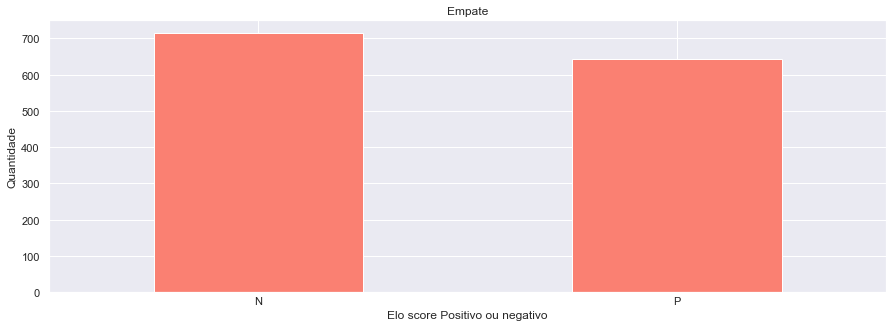

In [342]:
df_elo[df_elo.final_result=='D'].pos_neg.value_counts().plot(kind='bar', color='salmon')
cfg_plot("Empate", "Elo score Positivo ou negativo", "Quantidade")

Um empate não tem local para acontecer. Quase na mesma proporção os scores são positivos e negativos. Será que os times são de scores semelhantes ou pode variar?

In [344]:
df_elo[df_elo.final_result=='D'].describe()

,elo_home_score,elo_away_score,elo_diff
count,1357,1357,1357
mean,1554,1562,-9
std,133,139,119
min,1260,1248,-471
25%,1455,1455,-71
50%,1537,1549,-7
75%,1638,1653,58
max,2046,2044,426


Sim! O desvio padrão é bem mais alto que a média. Isso mostra que os empates ocorrem com uma variedade maior de scores Elo, o que na prática costuma acontecer com alguma frequência. Quando times pequenos empatam fora de casa contra times grandes é comum dizer que foi uma vitória para esses times, já que não existe um padrão que idetifique um empate com precisão já que os dados estão distribuídos mais uniformemente.x